<a href="https://colab.research.google.com/github/phanloc1622/BTVNAI_PHANXUANLOC_18146171/blob/main/CNN_NHANDIENTIENVN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
!pip install bing-image-downloader

In [67]:
from bing_image_downloader import downloader
downloader.download("Tờ Tiền Việt Nam 200",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Train/200')
downloader.download("Tờ Tiền Việt Nam 500",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Train/500')
downloader.download("Tờ Tiền Việt Nam 1000",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Train/1000')
downloader.download("Tờ Tiền Việt Nam 2000",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Train/2000')
downloader.download("Tờ Tiền Việt Nam 5000",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Train/5000')
downloader.download("Tờ Tiền Việt Nam 10000",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Train/10000')
downloader.download("Tờ Tiền Việt Nam 20000",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Train/20000')
downloader.download("Tờ Tiền Việt Nam 50000",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Train/50000')
downloader.download("Tờ Tiền Việt Nam 100000",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Train/100000')
downloader.download("Tờ Tiền Việt Nam 200000",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Train/200000')
downloader.download("Tờ Tiền Việt Nam 500000",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Train/500000')

[%] Downloading Images to /content/drive/MyDrive/Colab Notebooks/TienmatVN/Train/200/Tờ Tiền Việt Nam 200


[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from https://gonatour.vn/vnt_upload/news/05_2020/tien_200_dong_viet_nam.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn.sukhacnhau.com/wp-content/uploads/2019/12/200-dong.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://olm.vn/images/summary/200 đồng.png
[!] Issue getting: https://olm.vn/images/summary/200 đồng.png
[!] Error:: URL can't contain control characters. '/images/summary/200 đồng.png' (found at least ' ')
[%] Downloading Image #3 from https://reference.vn/wp-content/uploads/2019/08/Untitled-1-17.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://media.antt.vn/2015/09/11/20012_05_46_000000.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://choicasinotructuyen.net/wp-content/uploads/2020/02/TienRach2_BIDV-e1582693002394.jpg
[%] 

In [68]:
from bing_image_downloader import downloader
downloader.download("Tờ Tiền Việt Nam 200",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Test/200')
downloader.download("Tờ Tiền Việt Nam 500",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Test/500')
downloader.download("Tờ Tiền Việt Nam 1000",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Test/1000')
downloader.download("Tờ Tiền Việt Nam 2000",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Test/2000')
downloader.download("Tờ Tiền Việt Nam 5000",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Test/5000')
downloader.download("Tờ Tiền Việt Nam 10000",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Test/10000')
downloader.download("Tờ Tiền Việt Nam 20000",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Test/20000')
downloader.download("Tờ Tiền Việt Nam 50000",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Test/50000')
downloader.download("Tờ Tiền Việt Nam 100000",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Test/100000')
downloader.download("Tờ Tiền Việt Nam 200000",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Test/200000')
downloader.download("Tờ Tiền Việt Nam 500000",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Test/500000')

[%] Downloading Images to /content/drive/MyDrive/Colab Notebooks/TienmatVN/Test/200/Tờ Tiền Việt Nam 200


[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://gonatour.vn/vnt_upload/news/05_2020/tien_200_dong_viet_nam.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn.sukhacnhau.com/wp-content/uploads/2019/12/200-dong.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://reference.vn/wp-content/uploads/2019/08/Untitled-1-17.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://olm.vn/images/summary/200 đồng.png
[!] Issue getting: https://olm.vn/images/summary/200 đồng.png
[!] Error:: URL can't contain control characters. '/images/summary/200 đồng.png' (found at least ' ')
[%] Downloading Image #4 from http://media.antt.vn/2015/09/11/20012_05_46_000000.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://imgs.vietnamnet.vn/Images/2016/01/21/16/20160121161120-tiengia.jpg
[%] File Downloaded !



In [69]:
from bing_image_downloader import downloader
downloader.download("Tờ Tiền Việt Nam 200",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Validation/200')
downloader.download("Tờ Tiền Việt Nam 500",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Validation/500')
downloader.download("Tờ Tiền Việt Nam 1000",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Validation/1000')
downloader.download("Tờ Tiền Việt Nam 2000",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Validation/2000')
downloader.download("Tờ Tiền Việt Nam 5000",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Validation/5000')
downloader.download("Tờ Tiền Việt Nam 10000",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Validation/10000')
downloader.download("Tờ Tiền Việt Nam 20000",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Validation/20000')
downloader.download("Tờ Tiền Việt Nam 50000",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Validation/50000')
downloader.download("Tờ Tiền Việt Nam 100000",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Validation/100000')
downloader.download("Tờ Tiền Việt Nam 200000",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Validation/200000')
downloader.download("Tờ Tiền Việt Nam 500000",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/TienmatVN/Validation/500000')

[%] Downloading Images to /content/drive/MyDrive/Colab Notebooks/TienmatVN/Validation/200/Tờ Tiền Việt Nam 200


[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://gonatour.vn/vnt_upload/news/05_2020/tien_200_dong_viet_nam.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn.sukhacnhau.com/wp-content/uploads/2019/12/200-dong.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://reference.vn/wp-content/uploads/2019/08/Untitled-1-17.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://olm.vn/images/summary/200 đồng.png
[!] Issue getting: https://olm.vn/images/summary/200 đồng.png
[!] Error:: URL can't contain control characters. '/images/summary/200 đồng.png' (found at least ' ')
[%] Downloading Image #4 from http://media.antt.vn/2015/09/11/20012_05_46_000000.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://imgs.vietnamnet.vn/Images/2016/01/21/16/20160121161120-tiengia.jpg
[%] File Download

In [70]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_data=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/TienmatVN/Train',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')
validation_data=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/TienmatVN/Validation',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 218 images belonging to 11 classes.
Found 110 images belonging to 11 classes.


In [71]:
kieuhinh=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [72]:
training_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/TienmatVN/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 218 images belonging to 11 classes.


In [73]:
validation_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/TienmatVN/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 110 images belonging to 11 classes.


In [74]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
#model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 32)        36896     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 43808)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [75]:
training_data.class_indices

{'1000': 0,
 '10000': 1,
 '100000': 2,
 '200': 3,
 '2000': 4,
 '20000': 5,
 '200000': 6,
 '500': 7,
 '5000': 8,
 '50000': 9,
 '500000': 10}

In [76]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [77]:
callbacks=[EarlyStopping(monitor='val_loss',patience=20)]
history=model.fit(training_data,
                  steps_per_epoch=len(training_data),
                  batch_size = 64,
                  epochs=60,
                  validation_data=validation_data,
                  validation_steps=len(validation_data),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/60
7/7 [==============================] - 24s 3s/step - loss: 10.1062 - accuracy: 0.0596 - val_loss: 2.5652 - val_accuracy: 0.0636
Epoch 2/60
7/7 [==============================] - 23s 3s/step - loss: 2.4659 - accuracy: 0.1101 - val_loss: 2.3967 - val_accuracy: 0.1091
Epoch 3/60
7/7 [==============================] - 23s 3s/step - loss: 2.3924 - accuracy: 0.0780 - val_loss: 2.3847 - val_accuracy: 0.0818
Epoch 4/60
7/7 [==============================] - 23s 3s/step - loss: 2.4017 - accuracy: 0.1239 - val_loss: 2.3921 - val_accuracy: 0.0909
Epoch 5/60
7/7 [==============================] - 22s 3s/step - loss: 2.3725 - accuracy: 0.1239 - val_loss: 2.3879 - val_accuracy: 0.1364
Epoch 6/60
7/7 [==============================] - 22s 3s/step - loss: 2.3744 - accuracy: 0.1422 - val_loss: 2.3995 - val_accuracy: 0.1364
Epoch 7/60
7/7 [==============================] - 22s 3s/step - loss: 2.3470 - accuracy: 0.1101 - val_loss: 2.3737 - val_accuracy: 0.0909
Epoch 8/60
7/7 [=================

Sai số kiểm tra là:  1.3095920085906982
Độ chính xác kiểm tra là:  0.5


<function matplotlib.pyplot.show>

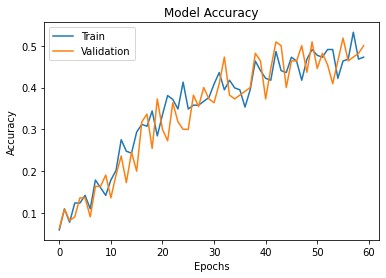

In [78]:
score = model.evaluate(validation_data,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [79]:
model.save("/content/drive/MyDrive/Colab Notebooks/TienmatVN/TienmatVN.h5")

In [80]:
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/Colab Notebooks/TienmatVN/TienmatVN.h5')

tờ 10000đ


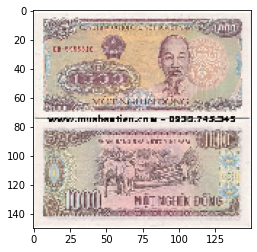

In [86]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/TienmatVN/Test/1000/Tờ Tiền Việt Nam 1000/Image_1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='tờ 1000đ'
if round(result[0][1])==1:
  prediction='tờ 10000đ'
if round(result[0][2])==1:
  prediction='tờ 100000đ'
if round(result[0][3])==1:
  prediction='tờ 200đ'
if round(result[0][4])==1:
  prediction='tờ 2000đ'
if round(result[0][5])==1:
  prediction='tờ 20000đ'
if round(result[0][6])==1:
  prediction='tờ 200000đ'
if round(result[0][7])==1:
  prediction='tờ 500đ'
if round(result[0][8])==1:
  prediction='tờ 5000đ'
if round(result[0][9])==1:
  prediction='tờ 50000đ'
if round(result[0][10])==1:
  prediction='tờ 500000đ'
print(prediction)

tờ 2000đ


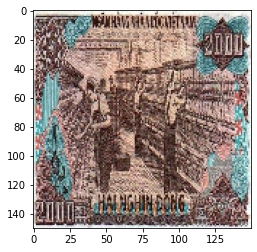

In [90]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/TienmatVN/Test/2000/Tờ Tiền Việt Nam 2000/Image_3.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='tờ 1000đ'
if round(result[0][1])==1:
  prediction='tờ 10000đ'
if round(result[0][2])==1:
  prediction='tờ 100000đ'
if round(result[0][3])==1:
  prediction='tờ 200đ'
if round(result[0][4])==1:
  prediction='tờ 2000đ'
if round(result[0][5])==1:
  prediction='tờ 20000đ'
if round(result[0][6])==1:
  prediction='tờ 200000đ'
if round(result[0][7])==1:
  prediction='tờ 500đ'
if round(result[0][8])==1:
  prediction='tờ 5000đ'
if round(result[0][9])==1:
  prediction='tờ 50000đ'
if round(result[0][10])==1:
  prediction='tờ 500000đ'
print(prediction)

tờ 50000đ


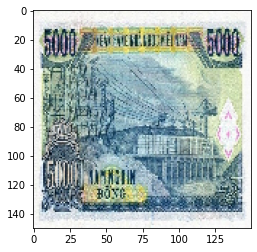

In [93]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/TienmatVN/Test/5000/Tờ Tiền Việt Nam 5000/Image_3.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='tờ 1000đ'
if round(result[0][1])==1:
  prediction='tờ 10000đ'
if round(result[0][2])==1:
  prediction='tờ 100000đ'
if round(result[0][3])==1:
  prediction='tờ 200đ'
if round(result[0][4])==1:
  prediction='tờ 2000đ'
if round(result[0][5])==1:
  prediction='tờ 20000đ'
if round(result[0][6])==1:
  prediction='tờ 200000đ'
if round(result[0][7])==1:
  prediction='tờ 500đ'
if round(result[0][8])==1:
  prediction='tờ 5000đ'
if round(result[0][9])==1:
  prediction='tờ 50000đ'
if round(result[0][10])==1:
  prediction='tờ 500000đ'
print(prediction)

tờ 10000đ


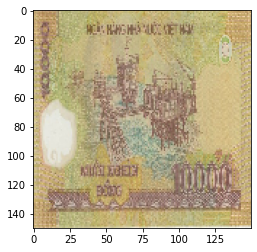

In [102]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/TienmatVN/Test/10000/Tờ Tiền Việt Nam 10000/Image_1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='tờ 1000đ'
if round(result[0][1])==1:
  prediction='tờ 10000đ'
if round(result[0][2])==1:
  prediction='tờ 100000đ'
if round(result[0][3])==1:
  prediction='tờ 200đ'
if round(result[0][4])==1:
  prediction='tờ 2000đ'
if round(result[0][5])==1:
  prediction='tờ 20000đ'
if round(result[0][6])==1:
  prediction='tờ 200000đ'
if round(result[0][7])==1:
  prediction='tờ 500đ'
if round(result[0][8])==1:
  prediction='tờ 5000đ'
if round(result[0][9])==1:
  prediction='tờ 50000đ'
if round(result[0][10])==1:
  prediction='tờ 500000đ'
print(prediction)

tờ 100000đ


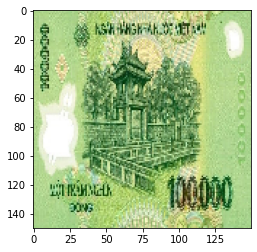

In [105]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/TienmatVN/Test/100000/Tờ Tiền Việt Nam 100000/Image_2.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='tờ 1000đ'
if round(result[0][1])==1:
  prediction='tờ 10000đ'
if round(result[0][2])==1:
  prediction='tờ 100000đ'
if round(result[0][3])==1:
  prediction='tờ 200đ'
if round(result[0][4])==1:
  prediction='tờ 2000đ'
if round(result[0][5])==1:
  prediction='tờ 20000đ'
if round(result[0][6])==1:
  prediction='tờ 200000đ'
if round(result[0][7])==1:
  prediction='tờ 500đ'
if round(result[0][8])==1:
  prediction='tờ 5000đ'
if round(result[0][9])==1:
  prediction='tờ 50000đ'
if round(result[0][10])==1:
  prediction='tờ 500000đ'
print(prediction)

tờ 200đ


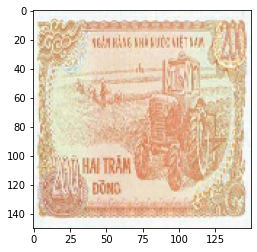

In [107]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/TienmatVN/Test/200/Tờ Tiền Việt Nam 200/Image_2.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='tờ 1000đ'
if round(result[0][1])==1:
  prediction='tờ 10000đ'
if round(result[0][2])==1:
  prediction='tờ 100000đ'
if round(result[0][3])==1:
  prediction='tờ 200đ'
if round(result[0][4])==1:
  prediction='tờ 2000đ'
if round(result[0][5])==1:
  prediction='tờ 20000đ'
if round(result[0][6])==1:
  prediction='tờ 200000đ'
if round(result[0][7])==1:
  prediction='tờ 500đ'
if round(result[0][8])==1:
  prediction='tờ 5000đ'
if round(result[0][9])==1:
  prediction='tờ 50000đ'
if round(result[0][10])==1:
  prediction='tờ 500000đ'
print(prediction)

tờ 2000đ


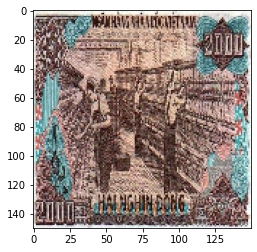

In [111]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/TienmatVN/Test/2000/Tờ Tiền Việt Nam 2000/Image_3.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='tờ 1000đ'
if round(result[0][1])==1:
  prediction='tờ 10000đ'
if round(result[0][2])==1:
  prediction='tờ 100000đ'
if round(result[0][3])==1:
  prediction='tờ 200đ'
if round(result[0][4])==1:
  prediction='tờ 2000đ'
if round(result[0][5])==1:
  prediction='tờ 20000đ'
if round(result[0][6])==1:
  prediction='tờ 200000đ'
if round(result[0][7])==1:
  prediction='tờ 500đ'
if round(result[0][8])==1:
  prediction='tờ 5000đ'
if round(result[0][9])==1:
  prediction='tờ 50000đ'
if round(result[0][10])==1:
  prediction='tờ 500000đ'
print(prediction)

tờ 200000đ


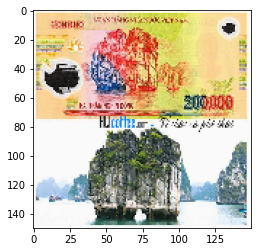

In [124]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/TienmatVN/Test/200000/Tờ Tiền Việt Nam 200000/Image_2.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='tờ 1000đ'
if round(result[0][1])==1:
  prediction='tờ 10000đ'
if round(result[0][2])==1:
  prediction='tờ 100000đ'
if round(result[0][3])==1:
  prediction='tờ 200đ'
if round(result[0][4])==1:
  prediction='tờ 2000đ'
if round(result[0][5])==1:
  prediction='tờ 20000đ'
if round(result[0][6])==1:
  prediction='tờ 200000đ'
if round(result[0][7])==1:
  prediction='tờ 500đ'
if round(result[0][8])==1:
  prediction='tờ 5000đ'
if round(result[0][9])==1:
  prediction='tờ 50000đ'
if round(result[0][10])==1:
  prediction='tờ 500000đ'
print(prediction)

tờ 500000đ


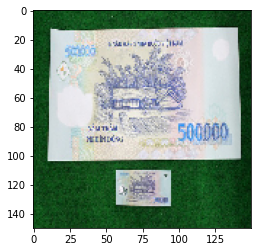

In [129]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/TienmatVN/Test/500000/Tờ Tiền Việt Nam 500000/Image_5.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='tờ 1000đ'
if round(result[0][1])==1:
  prediction='tờ 10000đ'
if round(result[0][2])==1:
  prediction='tờ 100000đ'
if round(result[0][3])==1:
  prediction='tờ 200đ'
if round(result[0][4])==1:
  prediction='tờ 2000đ'
if round(result[0][5])==1:
  prediction='tờ 20000đ'
if round(result[0][6])==1:
  prediction='tờ 200000đ'
if round(result[0][7])==1:
  prediction='tờ 500đ'
if round(result[0][8])==1:
  prediction='tờ 5000đ'
if round(result[0][9])==1:
  prediction='tờ 50000đ'
if round(result[0][10])==1:
  prediction='tờ 500000đ'
print(prediction)

tờ 500000đ


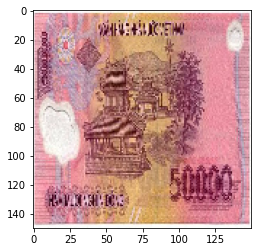

In [130]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/TienmatVN/Test/50000/Tờ Tiền Việt Nam 50000/Image_1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='tờ 1000đ'
if round(result[0][1])==1:
  prediction='tờ 10000đ'
if round(result[0][2])==1:
  prediction='tờ 100000đ'
if round(result[0][3])==1:
  prediction='tờ 200đ'
if round(result[0][4])==1:
  prediction='tờ 2000đ'
if round(result[0][5])==1:
  prediction='tờ 20000đ'
if round(result[0][6])==1:
  prediction='tờ 200000đ'
if round(result[0][7])==1:
  prediction='tờ 500đ'
if round(result[0][8])==1:
  prediction='tờ 5000đ'
if round(result[0][9])==1:
  prediction='tờ 50000đ'
if round(result[0][10])==1:
  prediction='tờ 500000đ'
print(prediction)